Import The Dependencies

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.linear_model import LinearRegression #for the model
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt

## DATA COLLECTION AND PROCESSING

In [37]:
#load the data
car_Dataset=pd.read_csv('car data.csv')
#Check the first 5 rows of the data
car_Dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [38]:
#checking the No of Rows and Columns
car_Dataset.shape

(301, 9)

In [39]:
#getting some information about the dataset
car_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
#It Checks for the Overall Data Distribution
car_Description=car_Dataset.describe()
print(car_Description)

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [46]:
#Checking for the Missing Values
car_Dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [48]:
#checking the distribtuion of categorical Data
print(car_Dataset.Fuel_Type.value_counts())
print(car_Dataset.Seller_Type.value_counts())
print(car_Dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [49]:
#Encoding the categorical data

#Encoding the "Fuel_Type" Column
car_Dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding the "Sellet_Type" Column
car_Dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding the "Transmission" Column
car_Dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [56]:
#Checking the Dataset after Encoding
car_Dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [57]:
# Checking the data type of the encoded data
car_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


### Splitting the data into Training data and Test data

In [58]:
X=car_Dataset.drop(['Car_Name','Selling_Price'],axis=1) #mention axis because we are dropping columns
Y=car_Dataset['Selling_Price']

In [62]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [63]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Splitting the Data into Training Data and Test data

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

### Checking the training data set and test data set

In [66]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(270, 7) (31, 7)
(270,) (31,)


### MODEL TRAINING

1. Linear Regression

In [67]:
#Loading the Linear Regression Model
lin_Reg_Model=LinearRegression() #Creating the Model

In [69]:
#Training the Model
lin_Reg_Model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [72]:
train_data_prediciton=lin_Reg_Model.predict(X_train)

In [73]:
# R Squared Error
error_Score=metrics.r2_score(train_data_prediciton,Y_train)
print(f"The R Squared Error is :{error_Score}")

The R Squared Error is :0.8635655509198654


### Visualize the Actual Prices and Predicted Prices

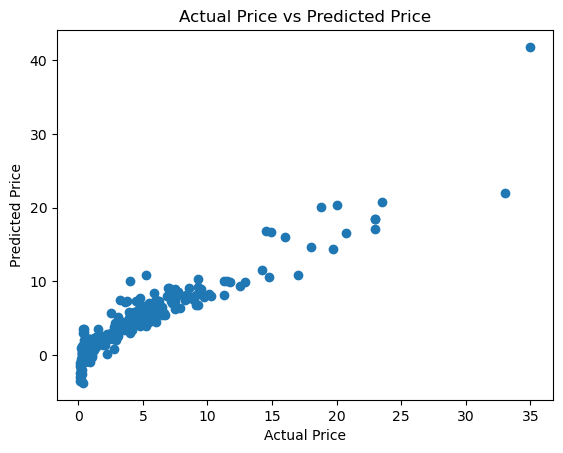

In [77]:
plt.scatter(Y_train,train_data_prediciton)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

### Predicting the Test Data

In [84]:
test_data_prediciton=lin_Reg_Model.predict(X_test)

### Finding the Error

In [83]:
error_Score=metrics.r2_score(Y_test,test_data_prediciton)
print(f"The R Squared Error is :{error_Score}")

The R Squared Error is :0.8365766715026928


### Plotting the Graph for the Test data and the Predicted Data

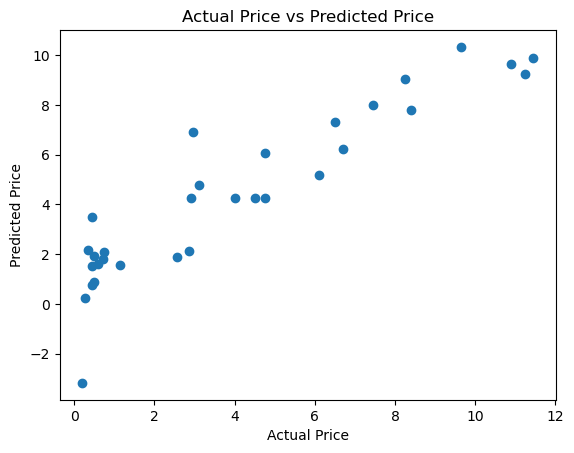

In [85]:
plt.scatter(Y_test,test_data_prediciton)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()